<h1>📈 Stock Price & Revenue Analysis with Python</h1>
<h2>Description</h2>

Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data.


This notebook presents an exploratory analysis of historical stock price and revenue data
for Tesla and GameStop. The objective is to examine trends, visualize the relationship
between stock prices and company revenues, and extract data-driven financial insights
using Python.

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>1. Data Collection - Tesla Stock Price</li>
        <li>2. Revenue Data Extraction - Tesla</li>
        <li>3. Data Collection - GameStop Stock Price</li>
        <li>4. Revenue Data Extraction - GameStop</li>
        <li>5. Tesla Stock Price and Revenue Visualization</li>
        <li>6. GameStop Stock Price and Revenue Visualization</li>
    </ul>
</div>
<hr>

In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In Python, we can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [4]:
# Helper function provided as part of the IBM Data Science curriculum
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

## 1. Data Collection - Tesla Stock Price


In this section, historical stock price data for Tesla is retrieved using the yfinance library to support time-series analysis.

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [6]:
tesla_data = tesla.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe.


In [7]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## 2. Revenue Data Extraction - Tesla


In this section, historical revenue data for Tesla is retrieved using the bs4 library to support time-series analysis.

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(URL).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [9]:
parsing_data = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [10]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

table = parsing_data.find_all('tbody')[1]

for row in table.find_all('tr'):
    col = row.find_all('td')

    date_data = col[0].text
    revenue_data = col[1].text

    data_dict = {'Date': date_data, 'Revenue': revenue_data}
    df = pd.DataFrame([data_dict])
    tesla_revenue = pd.concat([tesla_revenue, df], ignore_index=True)

Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [11]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3152827612.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)


Execute the following lines to remove an null or empty strings in the Revenue column.


In [12]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function.


In [13]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## 3. Data Collection - GameStop Stock Price


In this section, historical stock price data for GameStop is retrieved using the yfinance library to support time-series analysis.

In [14]:
gme = yf.Ticker('GME')

In [15]:
gme_data = gme.history(period='max')

In [16]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## 4. Revenue Data Extraction - GameStop


In this section, historical stock price data for GameStop is retrieved using the bs4 library to support time-series analysis.

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`


In [17]:
PATH = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(PATH).text

In [18]:
parsing_data = BeautifulSoup(html_data_2, 'html.parser')

In [19]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

table = parsing_data.find_all('tbody')[1]

for row in table.find_all('tr'):
    col = row.find_all('td')
    date = col[0].string
    num = col[1].string
    data_dict = {'Date': date, 'Revenue': num}
    df = pd.DataFrame([data_dict])
    gme_revenue = pd.concat([gme_revenue, df], ignore_index=True)

Remove the comma and dollar sign, an null or empty strings from the Revenue column.


In [20]:
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2709528454.py:1: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)


In [21]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

Display the last five rows of the `gme_revenue` dataframe using the `tail` function.


In [22]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## 5. Tesla Stock Price and Revenue Visualization


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


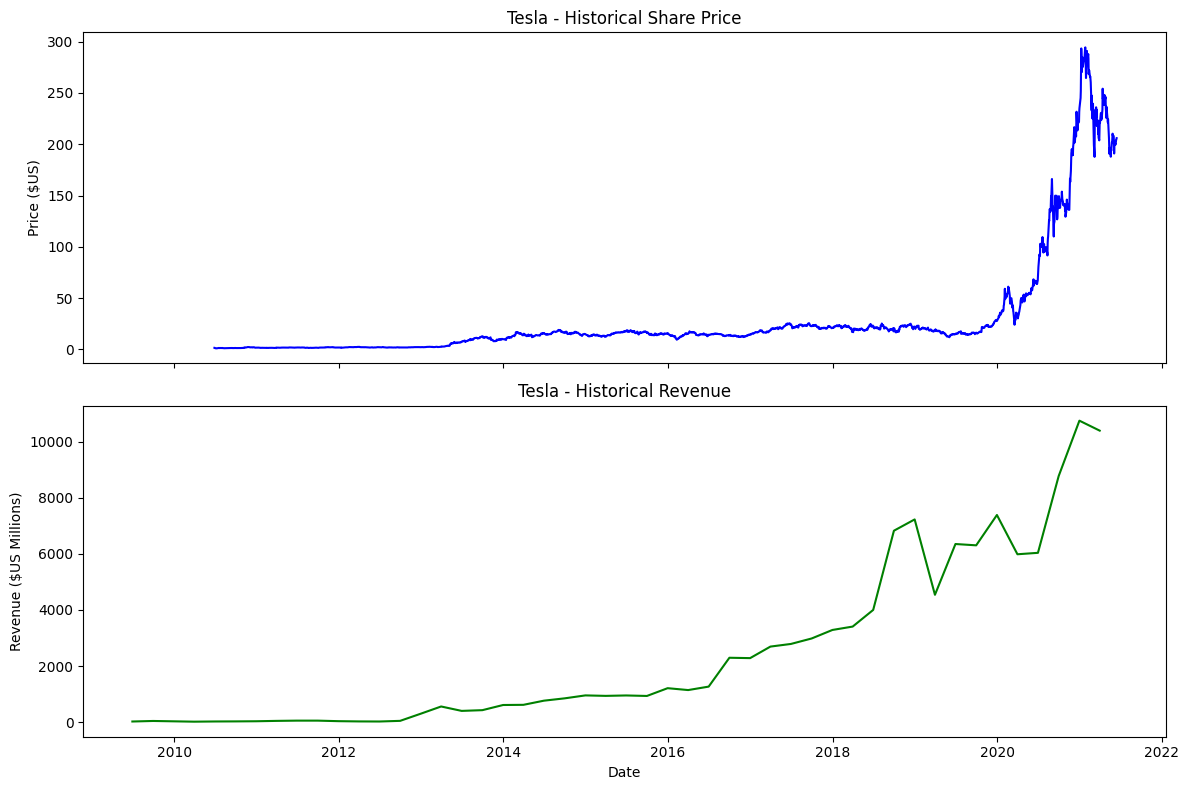

In [23]:
make_graph(tesla_data, tesla_revenue, "Tesla")

## 6. GameStop Stock Price and Revenue Visualization

Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


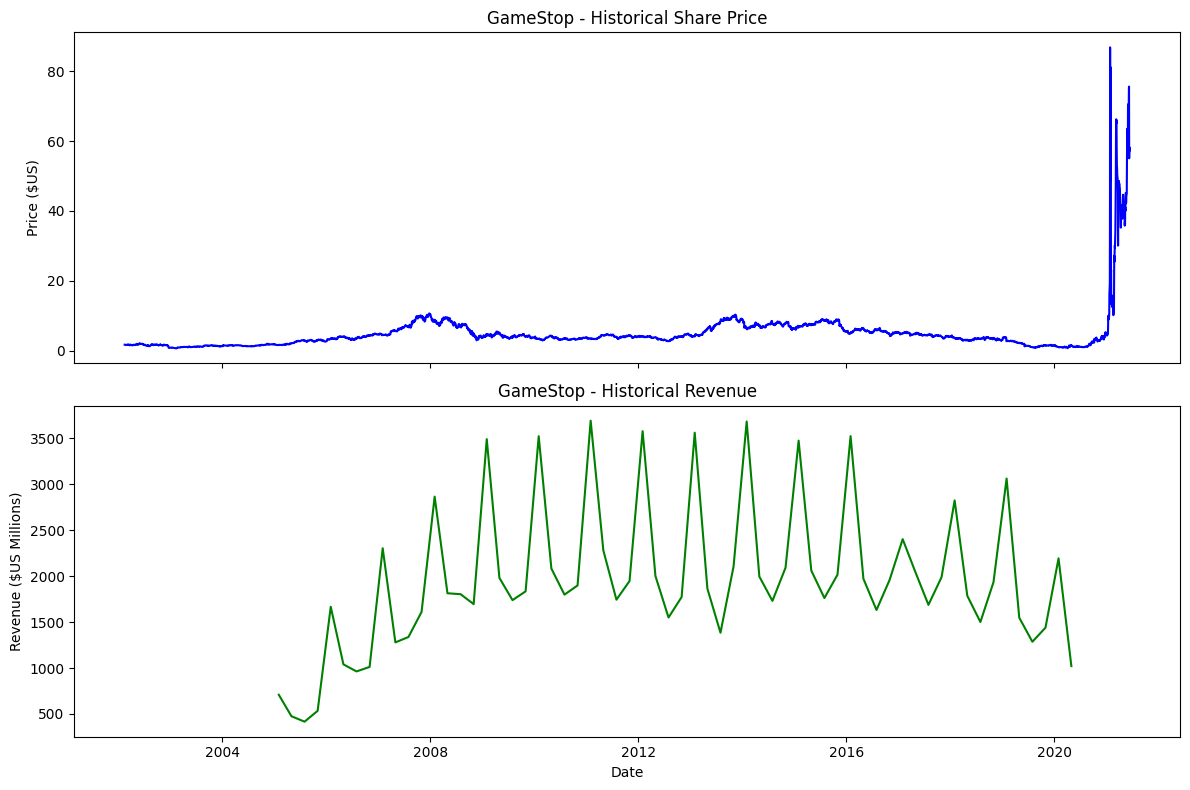

In [24]:
make_graph(gme_data, gme_revenue, 'GameStop')

## 🧠 Key Insights

- Tesla demonstrates strong revenue growth that aligns with its rising stock price, particularly after 2018, indicating fundamentals-driven performance.
- GameStop experienced a sharp stock price surge around 2021 without a corresponding increase in revenue, suggesting market-driven volatility rather than financial growth.

---

*This analysis was completed as part of the IBM Data Science curriculum and has been
refined for portfolio presentation.*
